# Setup

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay

# Creating the classes

### Data Explorer

In [2]:
class DataExplorer:
    @staticmethod
    def explore_data(data):
        print(data.head().T)
        print(data.describe())
        print(data.info())

    @staticmethod
    def plot_histograms(data):
        data.hist(bins=15, figsize=(15, 10))
        plt.show()

    @staticmethod
    def plot_correlation_matrix(data):
        plt.figure(figsize=(12, 8))
        sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap='coolwarm')
        plt.show()


### Wine Quality Model

In [3]:
class WineQualityModel:
    def __init__(self, filepath):
        self.filepath = filepath
        self.model_pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('classifier', LogisticRegression(max_iter=1000))
        ])
        self.X_train, self.X_test, self.y_train, self.y_test = [None] * 4

    def load_data(self):
        self.data = pd.read_csv(self.filepath)
        DataExplorer.explore_data(self.data)
        return self

    def preprocess_data(self):
        X = self.data.drop('quality', axis=1)
        y = self.data['quality']
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        return self

    def train_model(self):
        self.model_pipeline.fit(self.X_train, self.y_train)
        return self

    def evaluate_model(self):
        print("Model Evaluation:")
        y_pred = self.model_pipeline.predict(self.X_test)
        cm = confusion_matrix(self.y_test, y_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(self.y_test))
        disp.plot(cmap='Blues')
        plt.show()

        report = classification_report(self.y_test, y_pred)
        print("Classification Report:")
        print(report)
        return self

    def cross_validate_model(self):
        scores = cross_val_score(self.model_pipeline, self.X_train, self.y_train, cv=5)
        print("Average Accuracy with CV:", np.mean(scores))
        return self


# Executing the code

                            0        1       2       3        4
fixed_acidity          7.4000   7.8000   7.800  11.200   7.4000
volatile_acidity       0.7000   0.8800   0.760   0.280   0.7000
citric_acid            0.0000   0.0000   0.040   0.560   0.0000
residual_sugar         1.9000   2.6000   2.300   1.900   1.9000
chlorides              0.0760   0.0980   0.092   0.075   0.0760
free_sulfur_dioxide   11.0000  25.0000  15.000  17.000  11.0000
total_sulfur_dioxide  34.0000  67.0000  54.000  60.000  34.0000
density                0.9978   0.9968   0.997   0.998   0.9978
pH                     3.5100   3.2000   3.260   3.160   3.5100
sulphates              0.5600   0.6800   0.650   0.580   0.5600
alcohol                9.4000   9.8000   9.800   9.800   9.4000
quality                5.0000   5.0000   5.000   6.000   5.0000
       fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        7.215307      

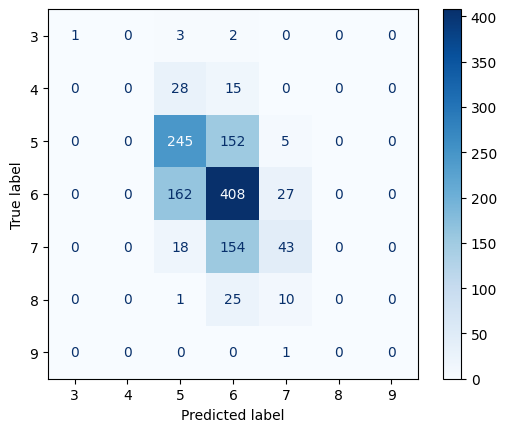

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

Classification Report:
              precision    recall  f1-score   support

           3       1.00      0.17      0.29         6
           4       0.00      0.00      0.00        43
           5       0.54      0.61      0.57       402
           6       0.54      0.68      0.60       597
           7       0.50      0.20      0.29       215
           8       0.00      0.00      0.00        36
           9       0.00      0.00      0.00         1

    accuracy                           0.54      1300
   macro avg       0.37      0.24      0.25      1300
weighted avg       0.50      0.54      0.50      1300

Average Accuracy with CV: 0.5480106611386688


In [4]:
filepath=r'https://raw.githubusercontent.com/EnmaGalindo/CLASE_MLOps/main/wine_quality_df.csv'

model = WineQualityModel(filepath)
model.load_data()
model.preprocess_data()
model.train_model()
model.evaluate_model()
model.cross_validate_model()